#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


#Load  Dataset

In [ ]:
#Read the csv File
df = pd.read_csv("drive/MyDrive/Diabetes-Prediction/diabetes.csv")

In [ ]:
#Display the CSV file
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##The Data we have is `Supervised` or `Structured Data` Featuring Columns
## The models we're going to use are the `Classification` Model

###Exploring Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


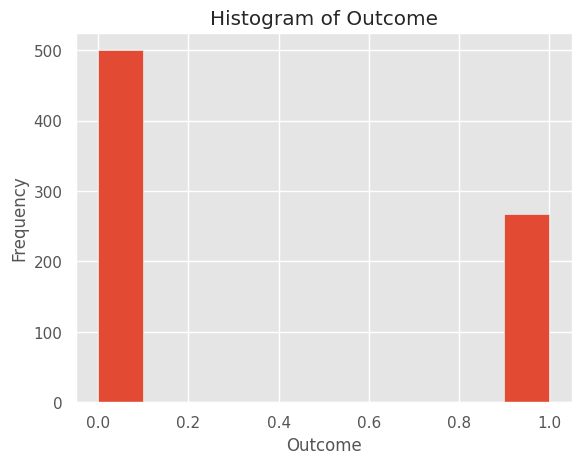

In [ ]:
plt.hist(df['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Outcome')
plt.show()

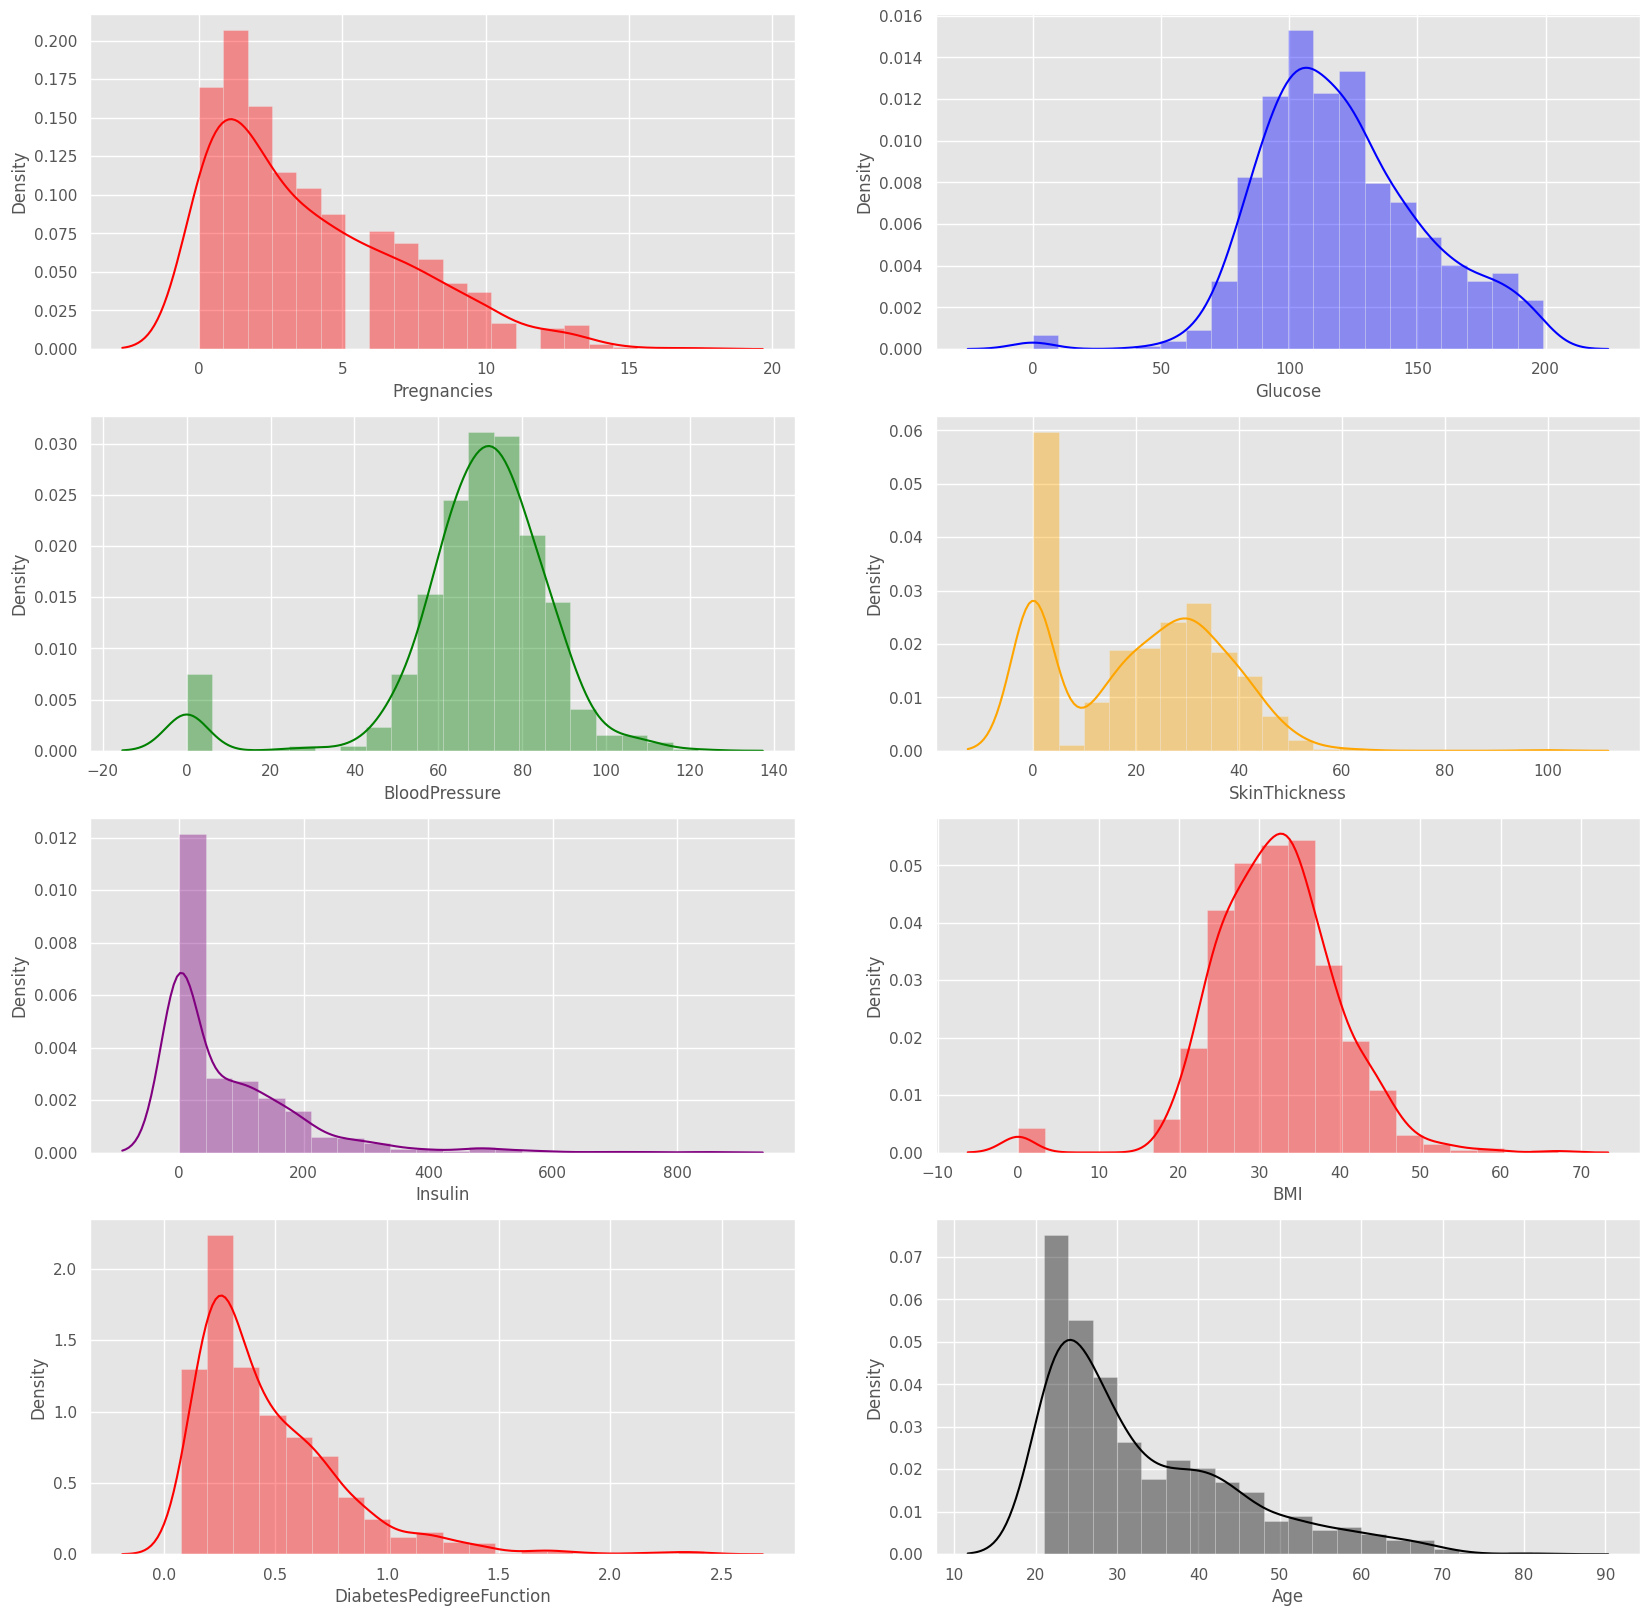

In [ ]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red");
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="blue");
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="green");
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="orange");
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="purple");
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red");
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red");
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="black");



In [ ]:
df.groupby("Outcome").agg({"Pregnancies":'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


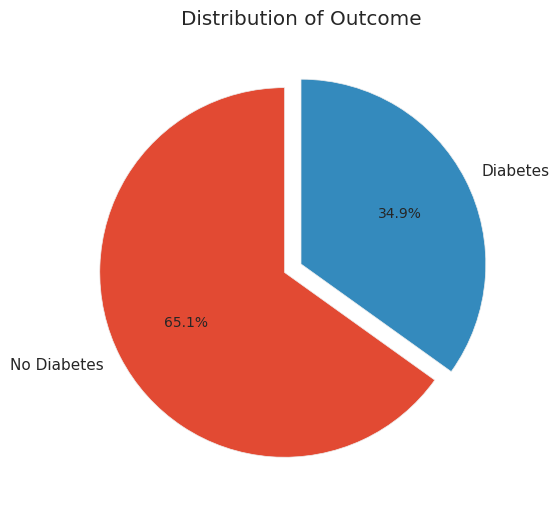

In [ ]:
# prompt: a pie chart using Outcome Column
# and gap between them

# Pie chart for Outcome
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title('Distribution of Outcome')
plt.show()

## To increase the accuracy score replace the `0` input values to `NaN` and then change them to their `median`

In [ ]:
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
    'DiabetesPedigreeFunction','Age']] = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
    'DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


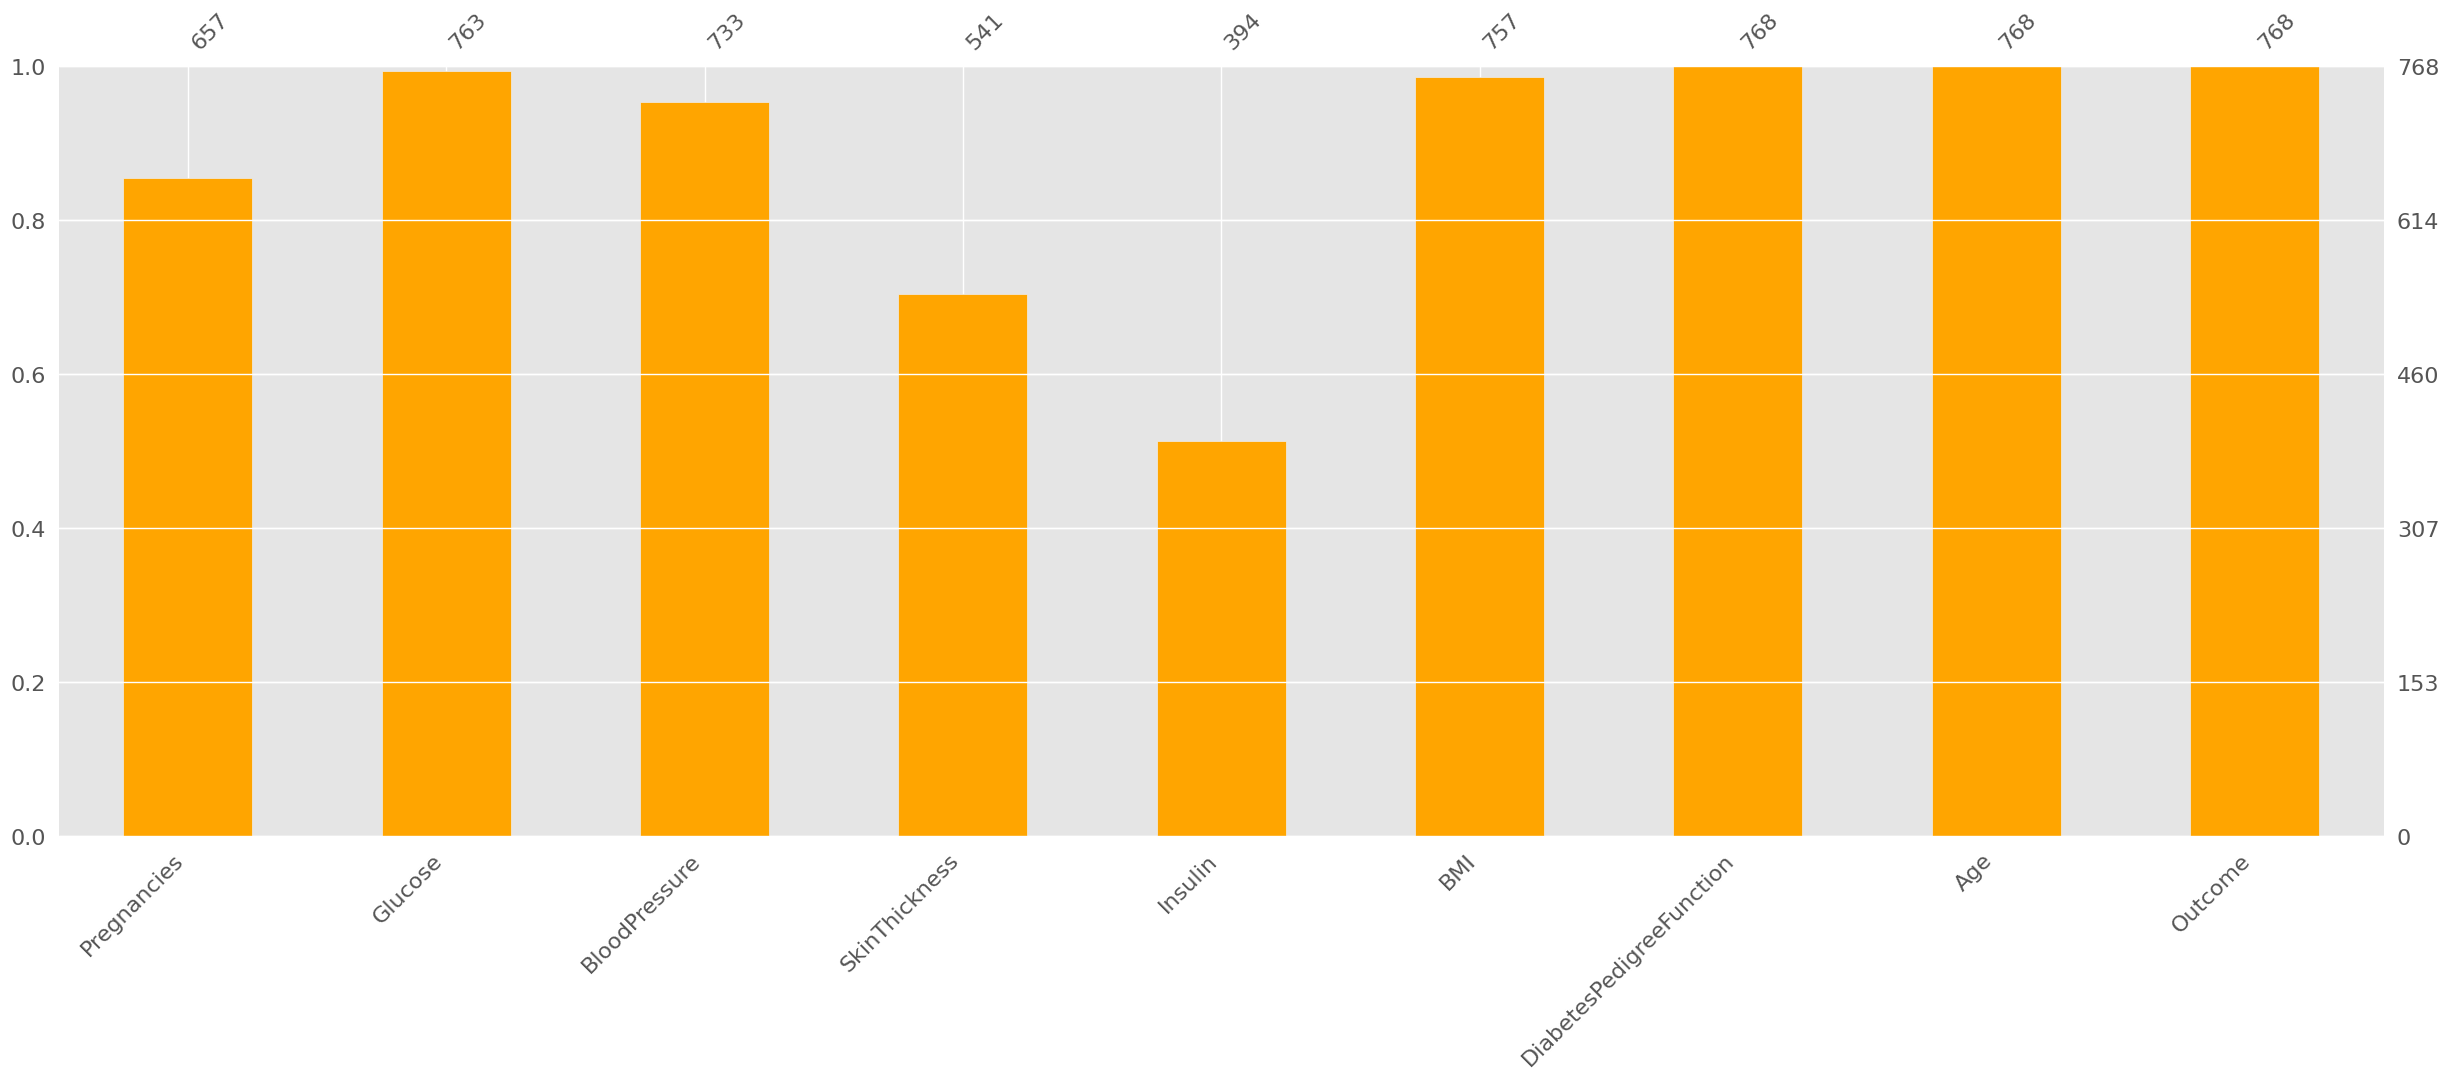

In [ ]:
# To know about the missing values using bar graph
import missingno as msno
msno.bar(df,figsize=(30,10),color="orange");

In [ ]:
def median_target(var):
  temp = df[df[var].notnull()]
  temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
  return temp

In [ ]:
columns = df.columns
columns = columns.drop('Outcome')
for i in columns:
  df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
  df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
p = sns.pairplot(df, hue='Outcome')

Output hidden; open in https://colab.research.google.com to view.

#Featuring Engineering
Feature engineering is used to improve the performance of machine learning models. It involves selecting, transforming, and creating new features from the existing raw data to make it more suitable for the model.

Benefits:

* Increased Accuracy: Engineered features can help capture important patterns and relationships in the data that the model might otherwise miss, leading to better predictions.

* Improved Model Interpretability: Well-engineered features can make the model's predictions easier to understand and explain.

* Reduced Overfitting: By creating more informative features, you can potentially reduce the risk of the model overfitting to the training data and improve its ability to generalize to unseen data.

* Handling Missing Values: Feature engineering techniques can be used to fill in missing values or create new features that represent the missingness in a meaningful way.

* Data Transformation: Transforming existing features, such as scaling or encoding categorical variables, can improve the model's performance, especially for algorithms sensitive to feature scales or data types.




In [ ]:
#Add New Column
NewBMI = pd.Series(["Underweight", "Normal", "Overweight",
                    "Obesity1","Obesity2","Obesity3"], dtype="category")

In [ ]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity1
4,Obesity2
5,Obesity3


In [ ]:
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] >= 25.0) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] >= 30.0) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] >= 35.0) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] >= 40.0, "NewBMI"] = NewBMI[5]

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity1
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity2
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1,Obesity1
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity1



###Insulin Level
###if Insulin level is <166 it is `normal` else `Abnormal`

In [ ]:
def set_insulin_level(row):
    if row['Insulin']>=16 and row['Insulin'] <= 166:
        return 'Normal'
    else:
        return 'Abnormal'

In [ ]:
df = df.assign(New_Insulin_Score=df.apply(set_insulin_level, axis=1))

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,New_Insulin_Score
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity1,Abnormal
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Obesity2,Normal
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Overweight,Normal
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1,Obesity1,Abnormal


In [ ]:
New_Glucose = pd.Series(["Low","Normal","Overweight","Secret","High"],dtype="category")

In [ ]:
New_Glucose

,0
0,Low
1,Normal
2,Overweight
3,Secret
4,High


In [ ]:
df["NewGlucose"]=New_Glucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = New_Glucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = New_Glucose[1]
df.loc[(df["Glucose"] >=99 & (df["Glucose"] <= 126)), "NewGlucose"] = New_Glucose[2]
df.loc[(df["Glucose"] >=126), "NewGlucose"] = New_Glucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,New_Insulin_Score,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal,Secret


In [ ]:
#One Hot Encoding
df = pd.get_dummies(df,columns=["NewBMI","NewGlucose","New_Insulin_Score"],drop_first=True).astype(int)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity1,NewBMI_Obesity2,NewBMI_Obesity3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,New_Insulin_Score_Normal
0,6,148,72,35,169,33,0,50,1,1,0,0,0,0,0,0,0,1,0
1,1,85,66,29,102,26,0,31,0,0,0,0,1,0,0,0,1,0,1
2,8,183,64,32,169,23,0,32,1,0,0,0,0,0,0,0,0,1,0
3,1,89,66,23,94,28,0,21,0,0,0,0,1,0,0,0,1,0,1
4,5,137,40,35,168,43,2,33,1,0,0,1,0,0,0,0,0,1,0


#Model Building

In [ ]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
X.shape , y.shape

((768, 18), (768,))

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity1,NewBMI_Obesity2,NewBMI_Obesity3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,New_Insulin_Score_Normal
60,2,84,70,27,102,30,0,21,1,0,0,0,0,0,0,1,0,1
618,9,112,82,24,169,28,1,50,0,0,0,1,0,0,0,1,0,0
346,1,139,46,19,83,28,0,22,0,0,0,1,0,0,0,0,1,1
294,3,161,50,27,102,21,0,65,0,0,0,0,0,0,0,0,1,1
231,6,134,80,37,370,46,0,46,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28,0,26,0,0,0,1,0,0,0,0,1,1
106,1,96,122,27,102,22,0,27,0,0,0,0,0,0,0,1,0,1
270,10,101,86,37,169,45,1,38,0,0,1,0,0,0,0,1,0,0
435,5,141,74,32,169,42,0,29,0,0,1,0,0,0,0,0,1,0


In [ ]:
Random_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75,
                                    min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)


In [ ]:
Random_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_preds = Random_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_preds))

0.8506493506493507


In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        99
           1       0.78      0.82      0.80        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154



In [ ]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [ ]:
grid_search_gbc.best_score_

0.8973823373876257

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [ ]:
gbc = grid_search_gbc.best_estimator_

In [ ]:
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))

0.9837133550488599


In [ ]:
y_preds = gbc.predict(X_test)
print(accuracy_score(y_test,y_preds))

0.8571428571428571


In [ ]:
print("Random classifier Score ",accuracy_score(y_test,y_preds))
print("Gradient Boosting Classifier Score ",accuracy_score(y_test,y_preds))

Random classifier Score  0.8571428571428571
Gradient Boosting Classifier Score  0.8571428571428571


In [ ]:
import pickle

# Save the model
with open('gbc_model.pkl', 'wb') as file:
    pickle.dump(gbc, file)

In [ ]:
# Open the file in read binary mode ('rb')
with open('drive/MyDrive/Diabetes-Prediction/gbc_model.pkl', 'rb') as file:
    # Load the model from the file
    gbc_model = pickle.load(file)

# Now you can use the loaded model, for example, to make predictions:
# predictions = gbc_model.predict(your_data)

In [ ]:
y_preds = gbc_model.predict(X_test)
acc = accuracy_score(y_test,y_preds)
print(f'AccuracyScore : {acc*100:.2f}%')

AccuracyScore : 86.36%


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming 'gbc_model' is your loaded model

# # Define input data as a dictionary
# input_data = {
#     'Pregnancies': 2,
#     'Glucose': 197,
#     'BloodPressure': 70,
#     'SkinThickness': 45,
#     'Insulin': 543,
#     'BMI': 30.5,
#     'DiabetesPedigreeFunction': 0.158,
#     'Age': 53
# }

# # Create a DataFrame from the input data
# input_df = pd.DataFrame([input_data])

# # Apply the same feature engineering steps to the input data as you did to your training data:

# # Recreating the NewBMI column
# NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity1", "Obesity2", "Obesity3"], dtype="category")
# input_df["NewBMI"] = NewBMI
# input_df.loc[input_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
# input_df.loc[(input_df["BMI"] >= 18.5) & (input_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
# input_df.loc[(input_df["BMI"] >= 25.0) & (input_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
# input_df.loc[(input_df["BMI"] >= 30.0) & (input_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
# input_df.loc[(input_df["BMI"] >= 35.0) & (input_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
# input_df.loc[input_df["BMI"] >= 40.0, "NewBMI"] = NewBMI[5]

# # Recreating the New_Insulin_Score column
# def set_insulin_level(row):
#     if row['Insulin'] >= 16 and row['Insulin'] <= 166:
#         return 'Normal'
#     else:
#         return 'Abnormal'
# input_df = input_df.assign(New_Insulin_Score=input_df.apply(set_insulin_level, axis=1))

# # Recreating the NewGlucose column
# New_Glucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
# input_df["NewGlucose"] = New_Glucose
# input_df.loc[input_df["Glucose"] <= 70, "NewGlucose"] = New_Glucose[0]
# input_df.loc[(input_df["Glucose"] > 70) & (input_df["Glucose"] <= 99), "NewGlucose"] = New_Glucose[1]
# input_df.loc[(input_df["Glucose"] >= 99) & (input_df["Glucose"] <= 126), "NewGlucose"] = New_Glucose[2]
# input_df.loc[(input_df["Glucose"] >= 126), "NewGlucose"] = New_Glucose[3]

# # One-hot encoding the engineered features
# input_df = pd.get_dummies(input_df, columns=["NewBMI", "NewGlucose", "New_Insulin_Score"], drop_first=True).astype(int)

# # Ensure the input_df has the same columns as the training data
# missing_cols = set(X_train.columns) - set(input_df.columns)
# for col in missing_cols:
#     input_df[col] = 0  # Add missing columns with 0 values
# input_df = input_df[X_train.columns]

In [ ]:
# input_data = (2,197,70,45,543,30.5,0.158,53)
# arr = np.array(input_data)
# # Convert to NumPy array and reshape
# arr = np.array(input_data).reshape(1, -1)
# pred = gbc_model.predict(arr)
# # print(pred)
# if pred[0]==0:
#     print("not")
# else:
#     print("Yes")